<a href="https://colab.research.google.com/github/chaitanyasinghnegi/Fire_detection/blob/main/fire_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="ENTER YOUR API KEY")
project = rf.workspace("mccaai-ohxca").project("fire-u163g")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fire-2 in yolov11:: 100%|██████████| 3454/3454 [00:00<00:00, 7391.84it/s]


In [4]:
dataset.location

'/content/fire-2'

In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
!yolo task=detect mode=train model=yolo11n.pt data="{dataset.location}/data.yaml" epochs=25 device=0 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 296MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/fire-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

In [7]:
!yolo task=detect mode=val model="firedetect.pt" data="{dataset.location}/data.yaml"

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/fire-2/valid/labels.cache... 347 images, 27 backgrounds, 0 corrupt: 100% 347/347 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 513. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:04<00:00,  4.64it/s]
                   all        347        513      0.839       0.63      0.766      0.431
Speed: 1.6ms preprocess, 4.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [8]:
!yolo task=detect mode=predict model="firedetect.pt" conf=0.25 source="{dataset.location}/test/images" save=True

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/164 /content/fire-2/test/images/0133_jpg.rf.e8dc97cb7cb4015d47dde8dcdd57677d.jpg: 640x640 (no detections), 18.8ms
image 2/164 /content/fire-2/test/images/0171_jpg.rf.98b9fe00d40d20b6f233d9a11385c86b.jpg: 640x640 (no detections), 8.6ms
image 3/164 /content/fire-2/test/images/100_jpg.rf.11aea3c48391622bf2fb5156a0fcca89.jpg: 640x640 1 fire, 8.1ms
image 4/164 /content/fire-2/test/images/1196_jpg.rf.3e17f55201b1a601d766959c28056f4e.jpg: 640x640 2 fires, 8.9ms
image 5/164 /content/fire-2/test/images/1404_jpg.rf.ca1ac4e7bd15e70cdcf5ba812d8f7d5e.jpg: 640x640 3 fires, 8.1ms
image 6/164 /content/fire-2/test/images/31_jpg.rf.09cd7096baaa60aa4cc94a316aac9a18.jpg: 640x640 3 fires, 8.0ms
image 7/164 /content/fire-2/test/images/35_jpg.rf.15b0a2776deb05d0970f199ae83826b5.jpg: 640x640 1 fire, 8.5ms
image 8/164 /content/fire-2/test/

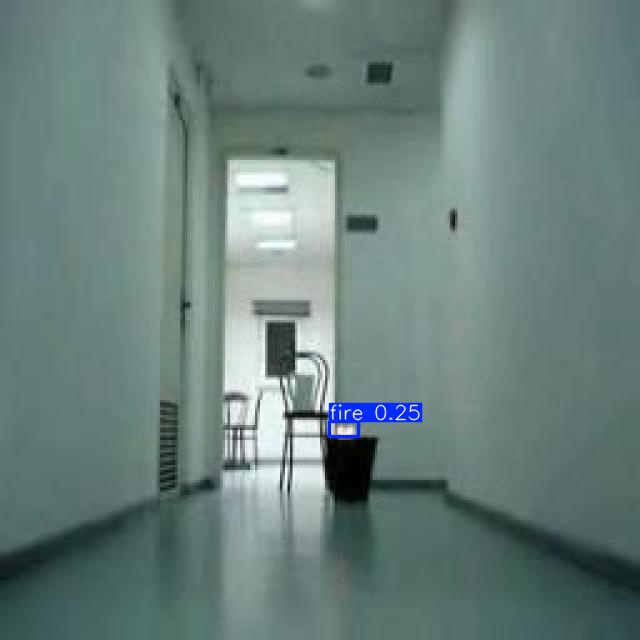

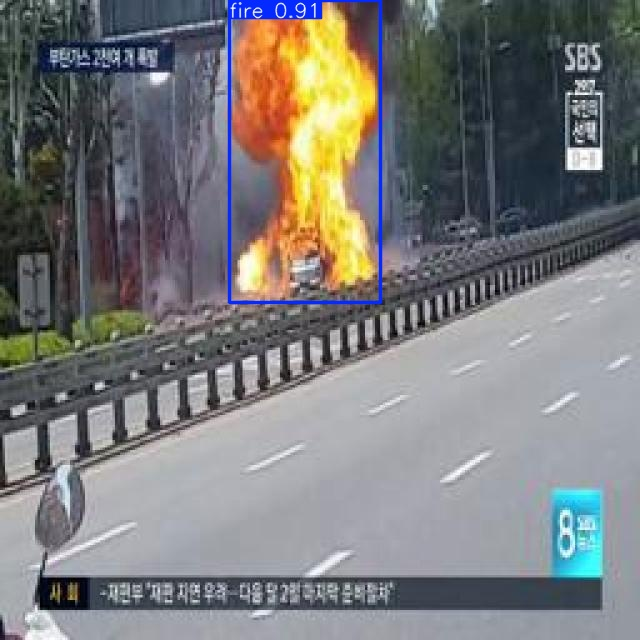

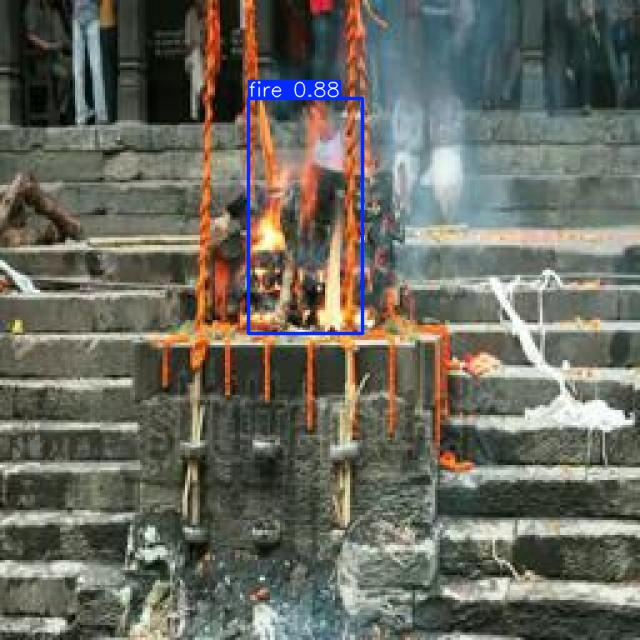

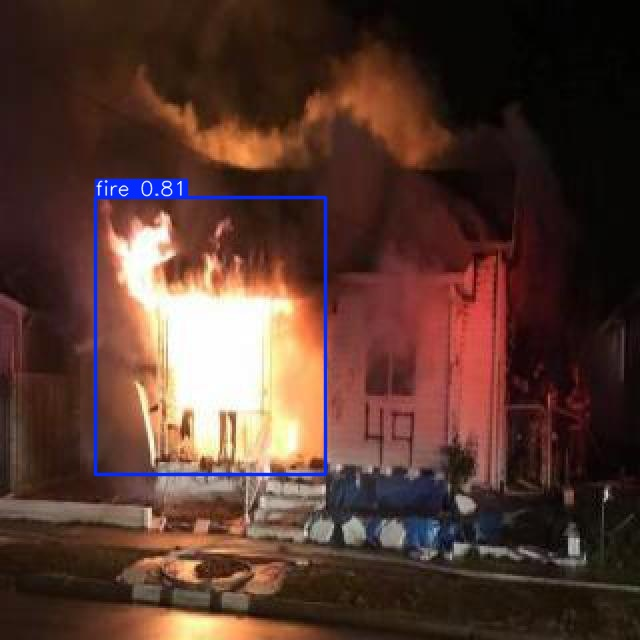

In [10]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'),key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:5]:
  display(IPyImage(filename=img,width=600))
  print("\n")

In [11]:
!yolo task=detect mode=predict model="firedetect.pt" conf=0.25 source="/content/firetest.mp4" save=True

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/1809) /content/firetest.mp4: 384x640 (no detections), 68.4ms
video 1/1 (frame 2/1809) /content/firetest.mp4: 384x640 1 fire, 14.7ms
video 1/1 (frame 3/1809) /content/firetest.mp4: 384x640 1 fire, 12.6ms
video 1/1 (frame 4/1809) /content/firetest.mp4: 384x640 1 fire, 12.9ms
video 1/1 (frame 5/1809) /content/firetest.mp4: 384x640 1 fire, 12.5ms
video 1/1 (frame 6/1809) /content/firetest.mp4: 384x640 (no detections), 12.7ms
video 1/1 (frame 7/1809) /content/firetest.mp4: 384x640 1 fire, 12.2ms
video 1/1 (frame 8/1809) /content/firetest.mp4: 384x640 1 fire, 13.2ms
video 1/1 (frame 9/1809) /content/firetest.mp4: 384x640 1 fire, 13.2ms
video 1/1 (frame 10/1809) /content/firetest.mp4: 384x640 1 fire, 14.7ms
video 1/1 (frame 11/1809) /content/firetest.mp4: 384x640 2 fires, 14.6ms
video 1/1 (frame 12/1809) /conte

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/firetest.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)